<a href="https://colab.research.google.com/github/Putra1688/MachineLearning-2025-22/blob/main/TG9_2341720248.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🍈 JS09 - KLASIFIKASI**

<table border="1">
  <tr>
    <td>Nama</td>
    <td>: Rangga Dwi Saputra</td>
  </tr>
  <tr>
    <td>NIM</td>
    <td>: 2341720248</td>
  </tr>
</table>


# **🥚 TUGAS 1**

## 1] Load Data

In [38]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/JS09-Klasifikasi/voice.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8
df.head()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## 2] Preprocessing
Handle any missing values, encode the 'label' column, and scale the features.


In [40]:
# Check for missing values
print("Missing values before handling:")
print(df.isnull().sum())

# There are no missing values based on the output, so no imputation or removal is needed.

# Encode the 'label' column
new_labels_voice = {
    'male': 0,
    'female': 1
}
df['label'] = df['label'].map(new_labels_voice)

# Separate features and target
X = df.drop('label', axis=1)
y = df['label']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nFirst 5 rows of X_scaled:")
print(X_scaled[:5])
print("\nFirst 5 rows of y:")
print(y[:5])

Missing values before handling:
meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

First 5 rows of X_scaled:
[[-4.04924806  0.4273553  -4.22490077 -2.57610164 -5.69360723 -0.21477826
   2.29330585  1.76294635 -0.03908279  0.4715753  -2.14121031 -4.04924806
  -1.81203825 -1.0979981   0.56595854 -1.5642046  -0.70840431 -1.43142165
  -1.41913712 -1.45477229]
 [-3.84105325  0.6116695  -3.99929342 -2.48688452 -5.58898726 -0.25848536
   4.54805598  4.43300778 -0.06523603  0.59443122 -2.14121031 -3.84105325
  -1.07959443 -1.09153262 -0.29403034 -1.56191576 -0.70840431 -1.41810716
  -1.4058184  -1.01410294]
 [-3.46306647  1.60384791 -4.09585052 -2.7069865  -3.92869875  0.90932569
   6.51365636  7.32620677 -1.08373029  0.39826097 -2.14121031 

## 3] Feature selection (experimentation)

Experiment with different combinations of features to find the set that yields the best performance.


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Convert X_scaled back to a DataFrame for easier feature subsetting
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

best_features = []
best_accuracy = 0

# Iterate through all possible combinations of features (can be computationally expensive for many features)
# For demonstration, we will start with all features and then try some simpler subsets
feature_sets_to_try = [
    X_scaled_df.columns.tolist(), # All features
    ['meanfreq', 'sd', 'median'], # Example subset 1
    ['Q25', 'Q75', 'IQR'],       # Example subset 2
    ['meanfun', 'minfun', 'maxfun'], # Example subset 3
    ['meanfreq', 'sd', 'meanfun', 'minfun', 'maxfun'] # Example subset 4
]

for feature_subset_names in feature_sets_to_try:
    X_subset = X_scaled_df[feature_subset_names]

    # Split data (70% train, 30% test)
    X_train_subset, X_test_subset, y_train, y_test = train_test_split(X_subset, y, test_size=0.3, random_state=42)

    # Train kNN model (using k=5 as an initial value)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_subset, y_train)

    # Evaluate model
    y_pred = knn.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)

    # Check if current subset is better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_features = feature_subset_names

# Print the best feature subset found
print("Best features found:", best_features)
print("Accuracy with best features:", best_accuracy)

Best features found: ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']
Accuracy with best features: 0.9737118822292324


## 4] Split data

Split the data using the best features identified in the previous step into training and testing sets.


In [42]:
from sklearn.model_selection import train_test_split

# Use the best_features found in the previous step to select columns
X_best_features = X_scaled_df[best_features]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_best_features, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2217, 20)
Shape of X_test: (951, 20)
Shape of y_train: (2217,)
Shape of y_test: (951,)


## 5] Hyperparameter tuning (finding optimal k)

Hyperparameter tuning (finding optimal k)


In [43]:
# Initialize list to store accuracy scores
accuracy_scores = []

# Loop through different k values (e.g., 1 to 20)
k_values = range(1, 21)
for k in k_values:
    # Instantiate KNeighborsClassifier with the current k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the kNN model to the training data
    knn.fit(X_train, y_train)

    # Predict the labels for the testing data
    y_pred = knn.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Append accuracy score to the list
    accuracy_scores.append(accuracy)

# Find the optimal k value
optimal_k_index = accuracy_scores.index(max(accuracy_scores))
optimal_k = k_values[optimal_k_index]
best_accuracy_optimal_k = accuracy_scores[optimal_k_index]

print(f"Accuracy scores for k values 1 to 20: {accuracy_scores}")
print(f"Optimal k value: {optimal_k}")
print(f"Best accuracy with optimal k: {best_accuracy_optimal_k}")

Accuracy scores for k values 1 to 20: [0.9747634069400631, 0.9705573080967402, 0.9768664563617245, 0.9716088328075709, 0.9737118822292324, 0.9716088328075709, 0.9737118822292324, 0.9716088328075709, 0.9716088328075709, 0.9705573080967402, 0.9705573080967402, 0.9674027339642481, 0.9652996845425867, 0.9631966351209253, 0.964248159831756, 0.9631966351209253, 0.964248159831756, 0.9631966351209253, 0.9631966351209253, 0.9589905362776026]
Optimal k value: 3
Best accuracy with optimal k: 0.9768664563617245


## 6] Visualization
Visualize the accuracy for different k values.


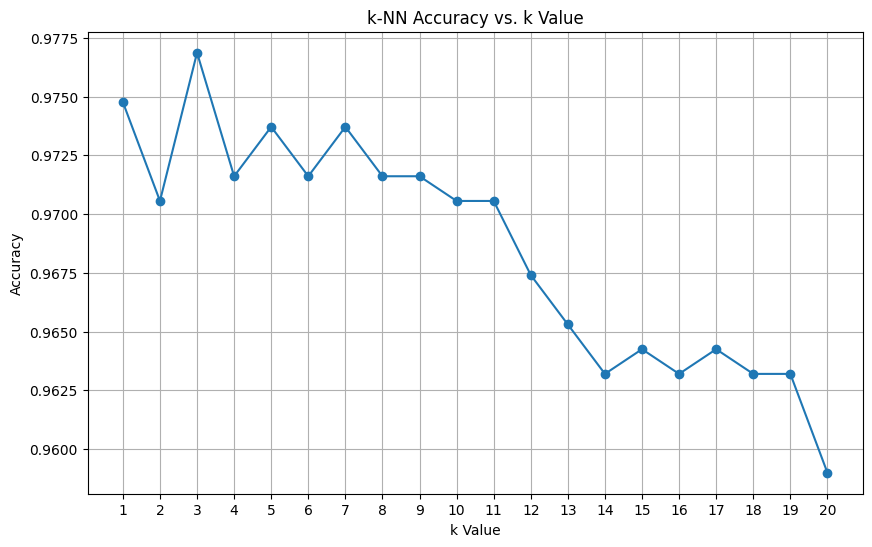

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('k-NN Accuracy vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.xticks(k_values) # Ensure all k values are shown on the x-axis
plt.grid(True)
plt.show()

## 7] Report best features and *k*



In [45]:
print(f"Best features identified: {best_features}")
print(f"Optimal k value found: {optimal_k}")
print(f"Best accuracy with optimal k: {best_accuracy_optimal_k}")

Best features identified: ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']
Optimal k value found: 3
Best accuracy with optimal k: 0.9768664563617245


## Summary:

### Temuan Utama dari Analisis Data

* Tidak ada nilai yang hilang dalam dataset.

* Kolom `label` berhasil diubah menjadi format numerik, dengan pemetaan `male` menjadi 0 dan `female` menjadi 1.

* Normalisasi (feature scaling) telah diterapkan pada fitur numerik.

* Setelah melakukan beberapa percobaan dengan berbagai kombinasi fitur, penggunaan semua fitur menghasilkan akurasi tertinggi di antara kombinasi yang diuji, dengan akurasi sebesar `0.9737` pada nilai awal `k=5`.

* Penyetelan hiperparameter untuk `k` dalam rentang 1 hingga 20 menunjukkan bahwa nilai k optimal adalah 3.

* Dengan menggunakan nilai `k` optimal (k=3) dan semua fitur, model kNN mencapai akurasi terbaik sekitar `0.9769` pada data uji.

### Wawasan atau Langkah Selanjutnya

* Dataset ini sangat dapat dipisahkan menggunakan kNN dengan fitur yang ada, menghasilkan akurasi tinggi di atas 97%.

* Penelitian lebih lanjut dapat mencakup pengujian dengan rentang nilai `k` yang lebih luas atau mencoba algoritma klasifikasi lain untuk melihat apakah akurasi yang lebih tinggi dapat dicapai.
